In [92]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import openpyxl
import japanize_matplotlib # 追加

In [55]:
csv_file_path = "/home/rest/forpyzx/kekka0107/0107bunpu.csv"
df = pd.read_csv(csv_file_path)
print(df)

                    optimize_name                       data_name  qubit  \
0    clifford_simp_not_post_basic       q4_gates500_pt0_seeds1000      4   
1    clifford_simp_not_post_basic       q4_gates500_pt0_seeds1001      4   
2    clifford_simp_not_post_basic       q4_gates500_pt0_seeds1002      4   
3    clifford_simp_not_post_basic    q4_gates500_pt0.12_seeds1000      4   
4    clifford_simp_not_post_basic    q4_gates500_pt0.12_seeds1001      4   
..                            ...                             ...    ...   
187  clifford_simp_not_post_basic  q16_gates10000_pt0.2_seeds1001     16   
188  clifford_simp_not_post_basic  q16_gates10000_pt0.2_seeds1002     16   
189  clifford_simp_not_post_basic  q16_gates10000_pt0.4_seeds1000     16   
190  clifford_simp_not_post_basic  q16_gates10000_pt0.4_seeds1001     16   
191  clifford_simp_not_post_basic  q16_gates10000_pt0.4_seeds1002     16   

     input_gates   p_t  seed  gates_aft  one-qubit_gates  two-qubit_gates  \
0         

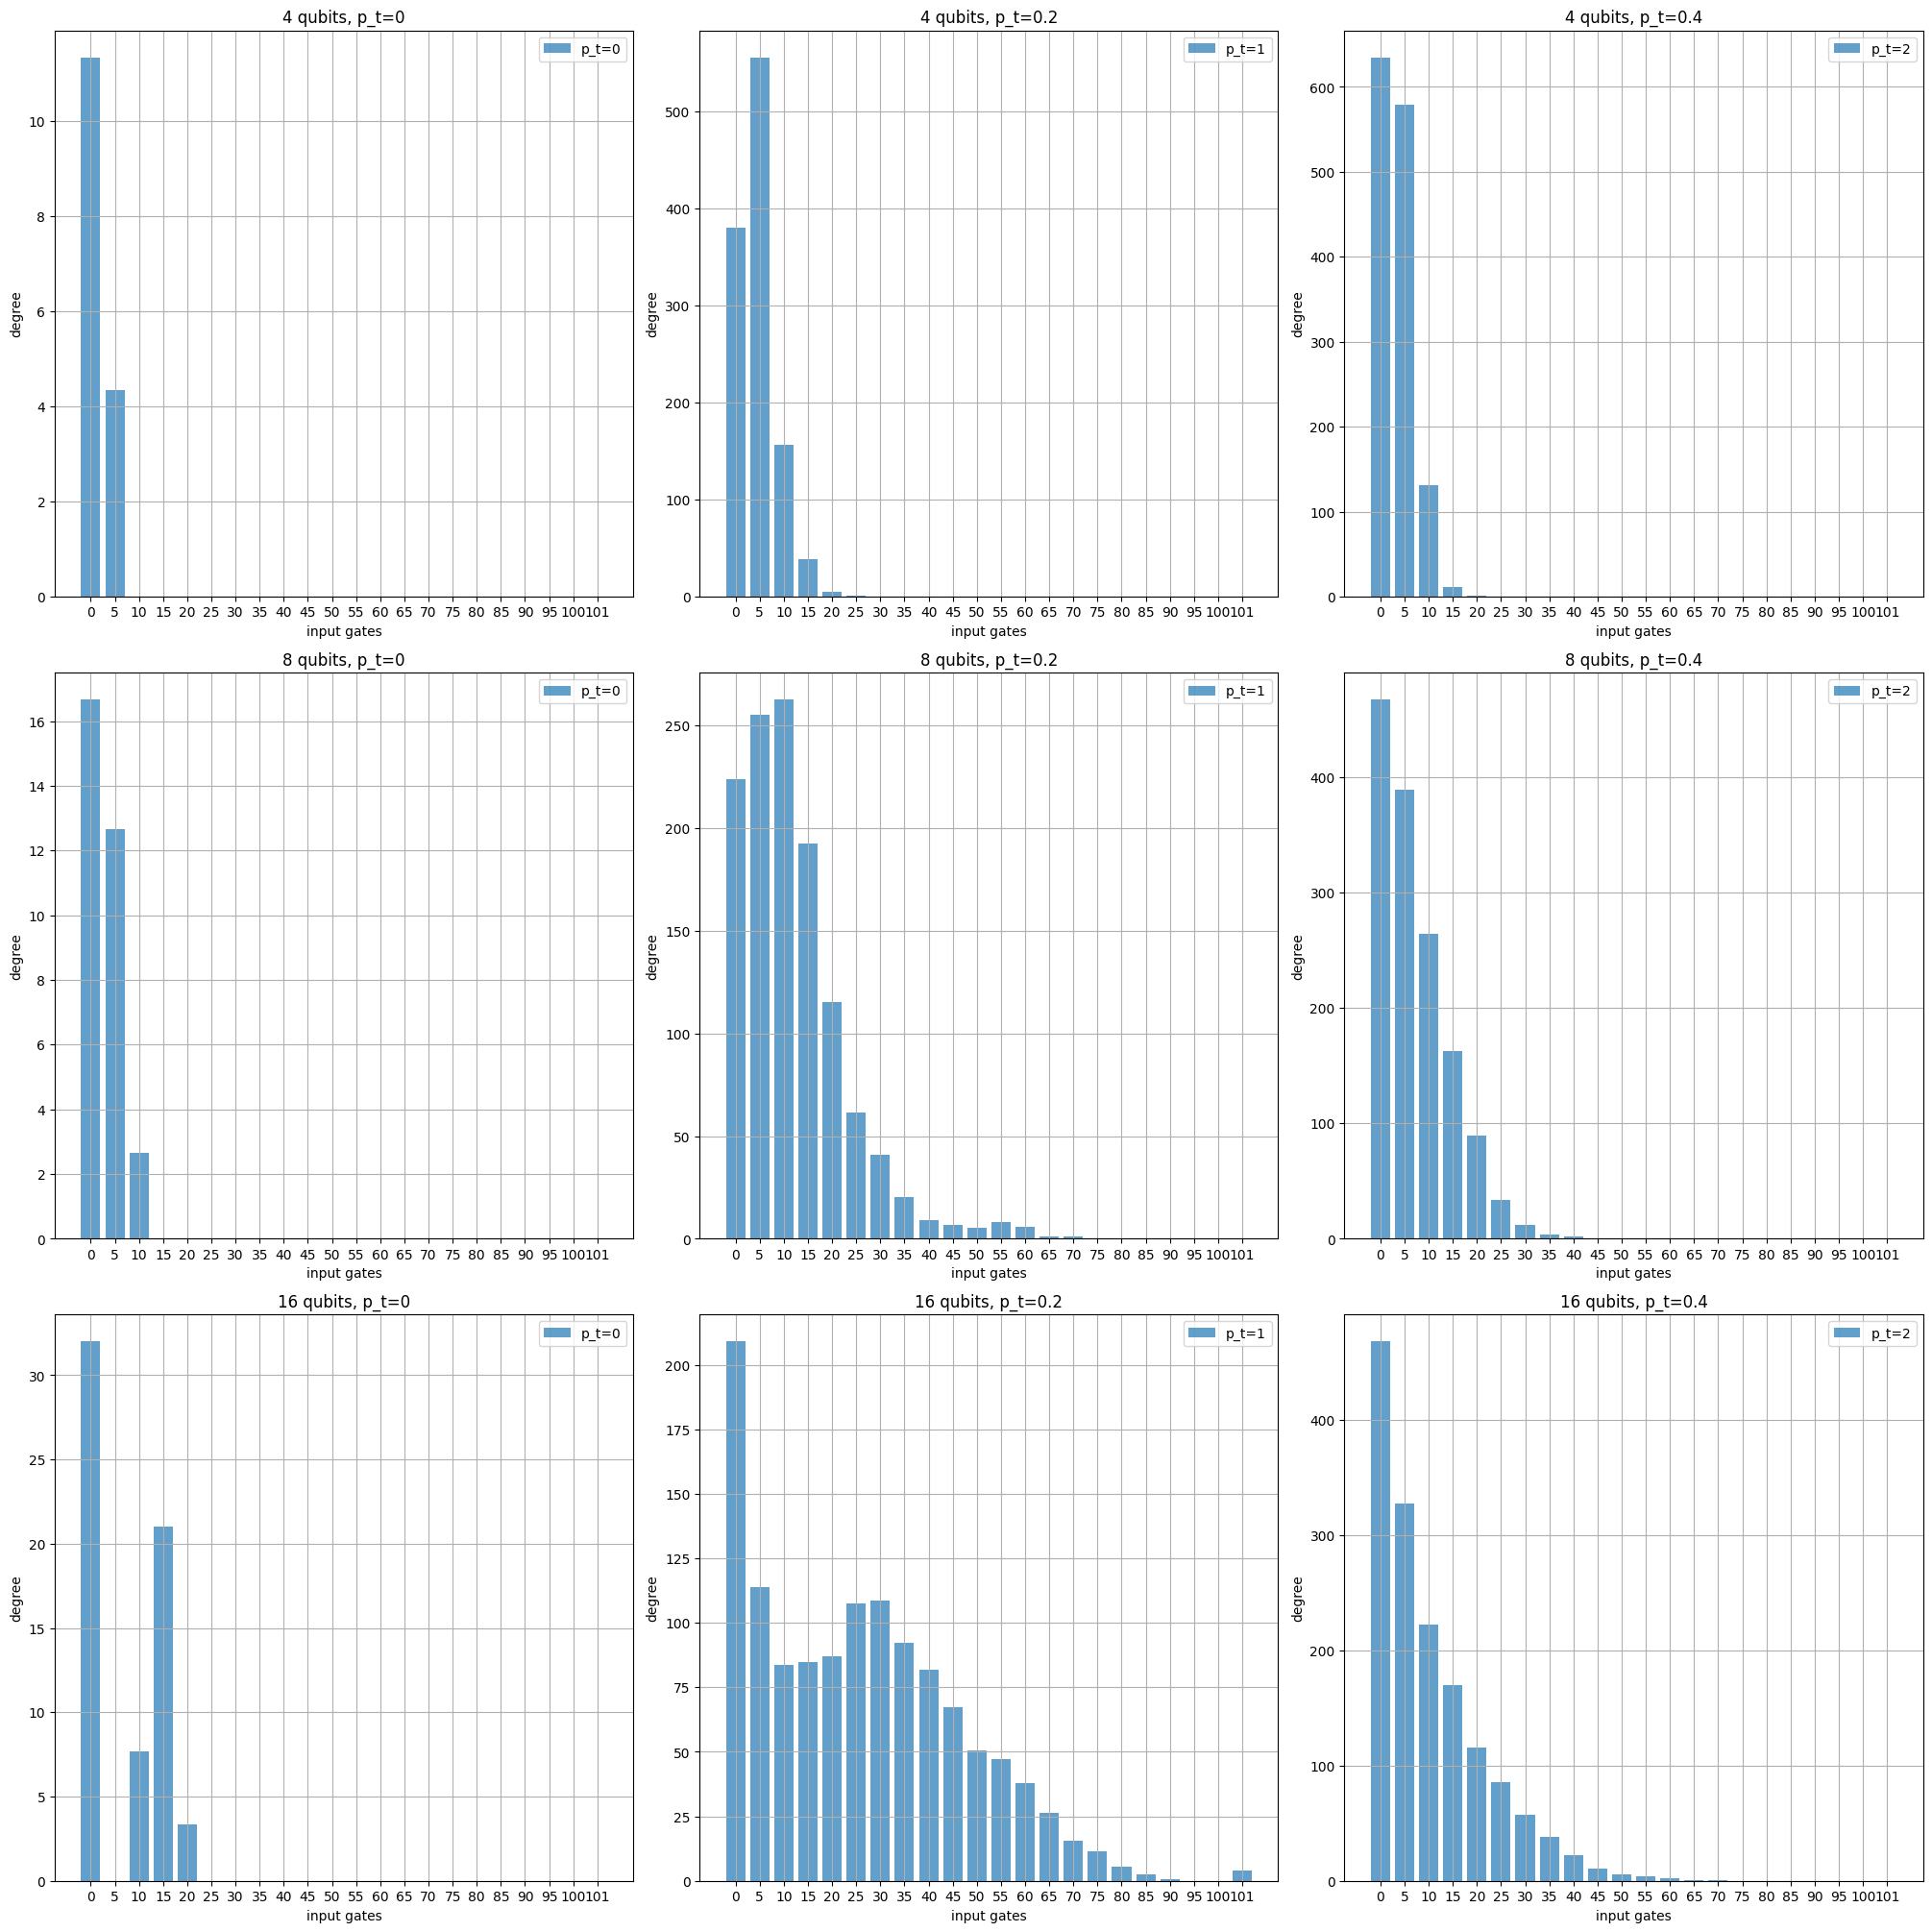

In [30]:

qubits = [4,8,16]
gates = [500,1000,5000,10000]
p_t_lists = [0,0.12,0.20,0.40]
plot_columns = [str(i) for i in range(0, 101, 5)]
plot_columns.append("101")
#fig,axes = plt.subplots(7,11)

fig, ax = plt.subplots(len(qubits),len(p_t_lists),figsize=(20, 20),constrained_layout=True)
for qubit in range(len(qubits)):
        for p_t in range(len(p_t_lists)):
            #print(qubit,p_t)
            ax[qubit][p_t].set_title(f"{qubits[qubit]} qubits, p_t={p_t_lists[p_t]}")
            ax[qubit][p_t].set_xlabel("input gates")
            ax[qubit][p_t].set_ylabel("degree")
            #ax[qubit][p_t].set_xlim(0, 11000)
            #ax[qubit][p_t].set_xticks(np.arange(0, 10001, 1000))
            ax[qubit][p_t].grid(True)

            data = df[(df["p_t"] == p_t_lists[p_t]) & (df["qubit"] == qubits[qubit]) & (df["input_gates"] == 10000)]
            #print(data)
            df_avg = data.groupby("optimize_name")[plot_columns].mean()
            #print(df_avg.iloc[0].values)

            numeric_data = df_avg.iloc[0].values.tolist()
            #print(numeric_data)

            ax[qubit][p_t].bar(plot_columns, numeric_data, label=f"p_t={p_t}",alpha=0.7)
            ax[qubit][p_t].legend()

plt.show()



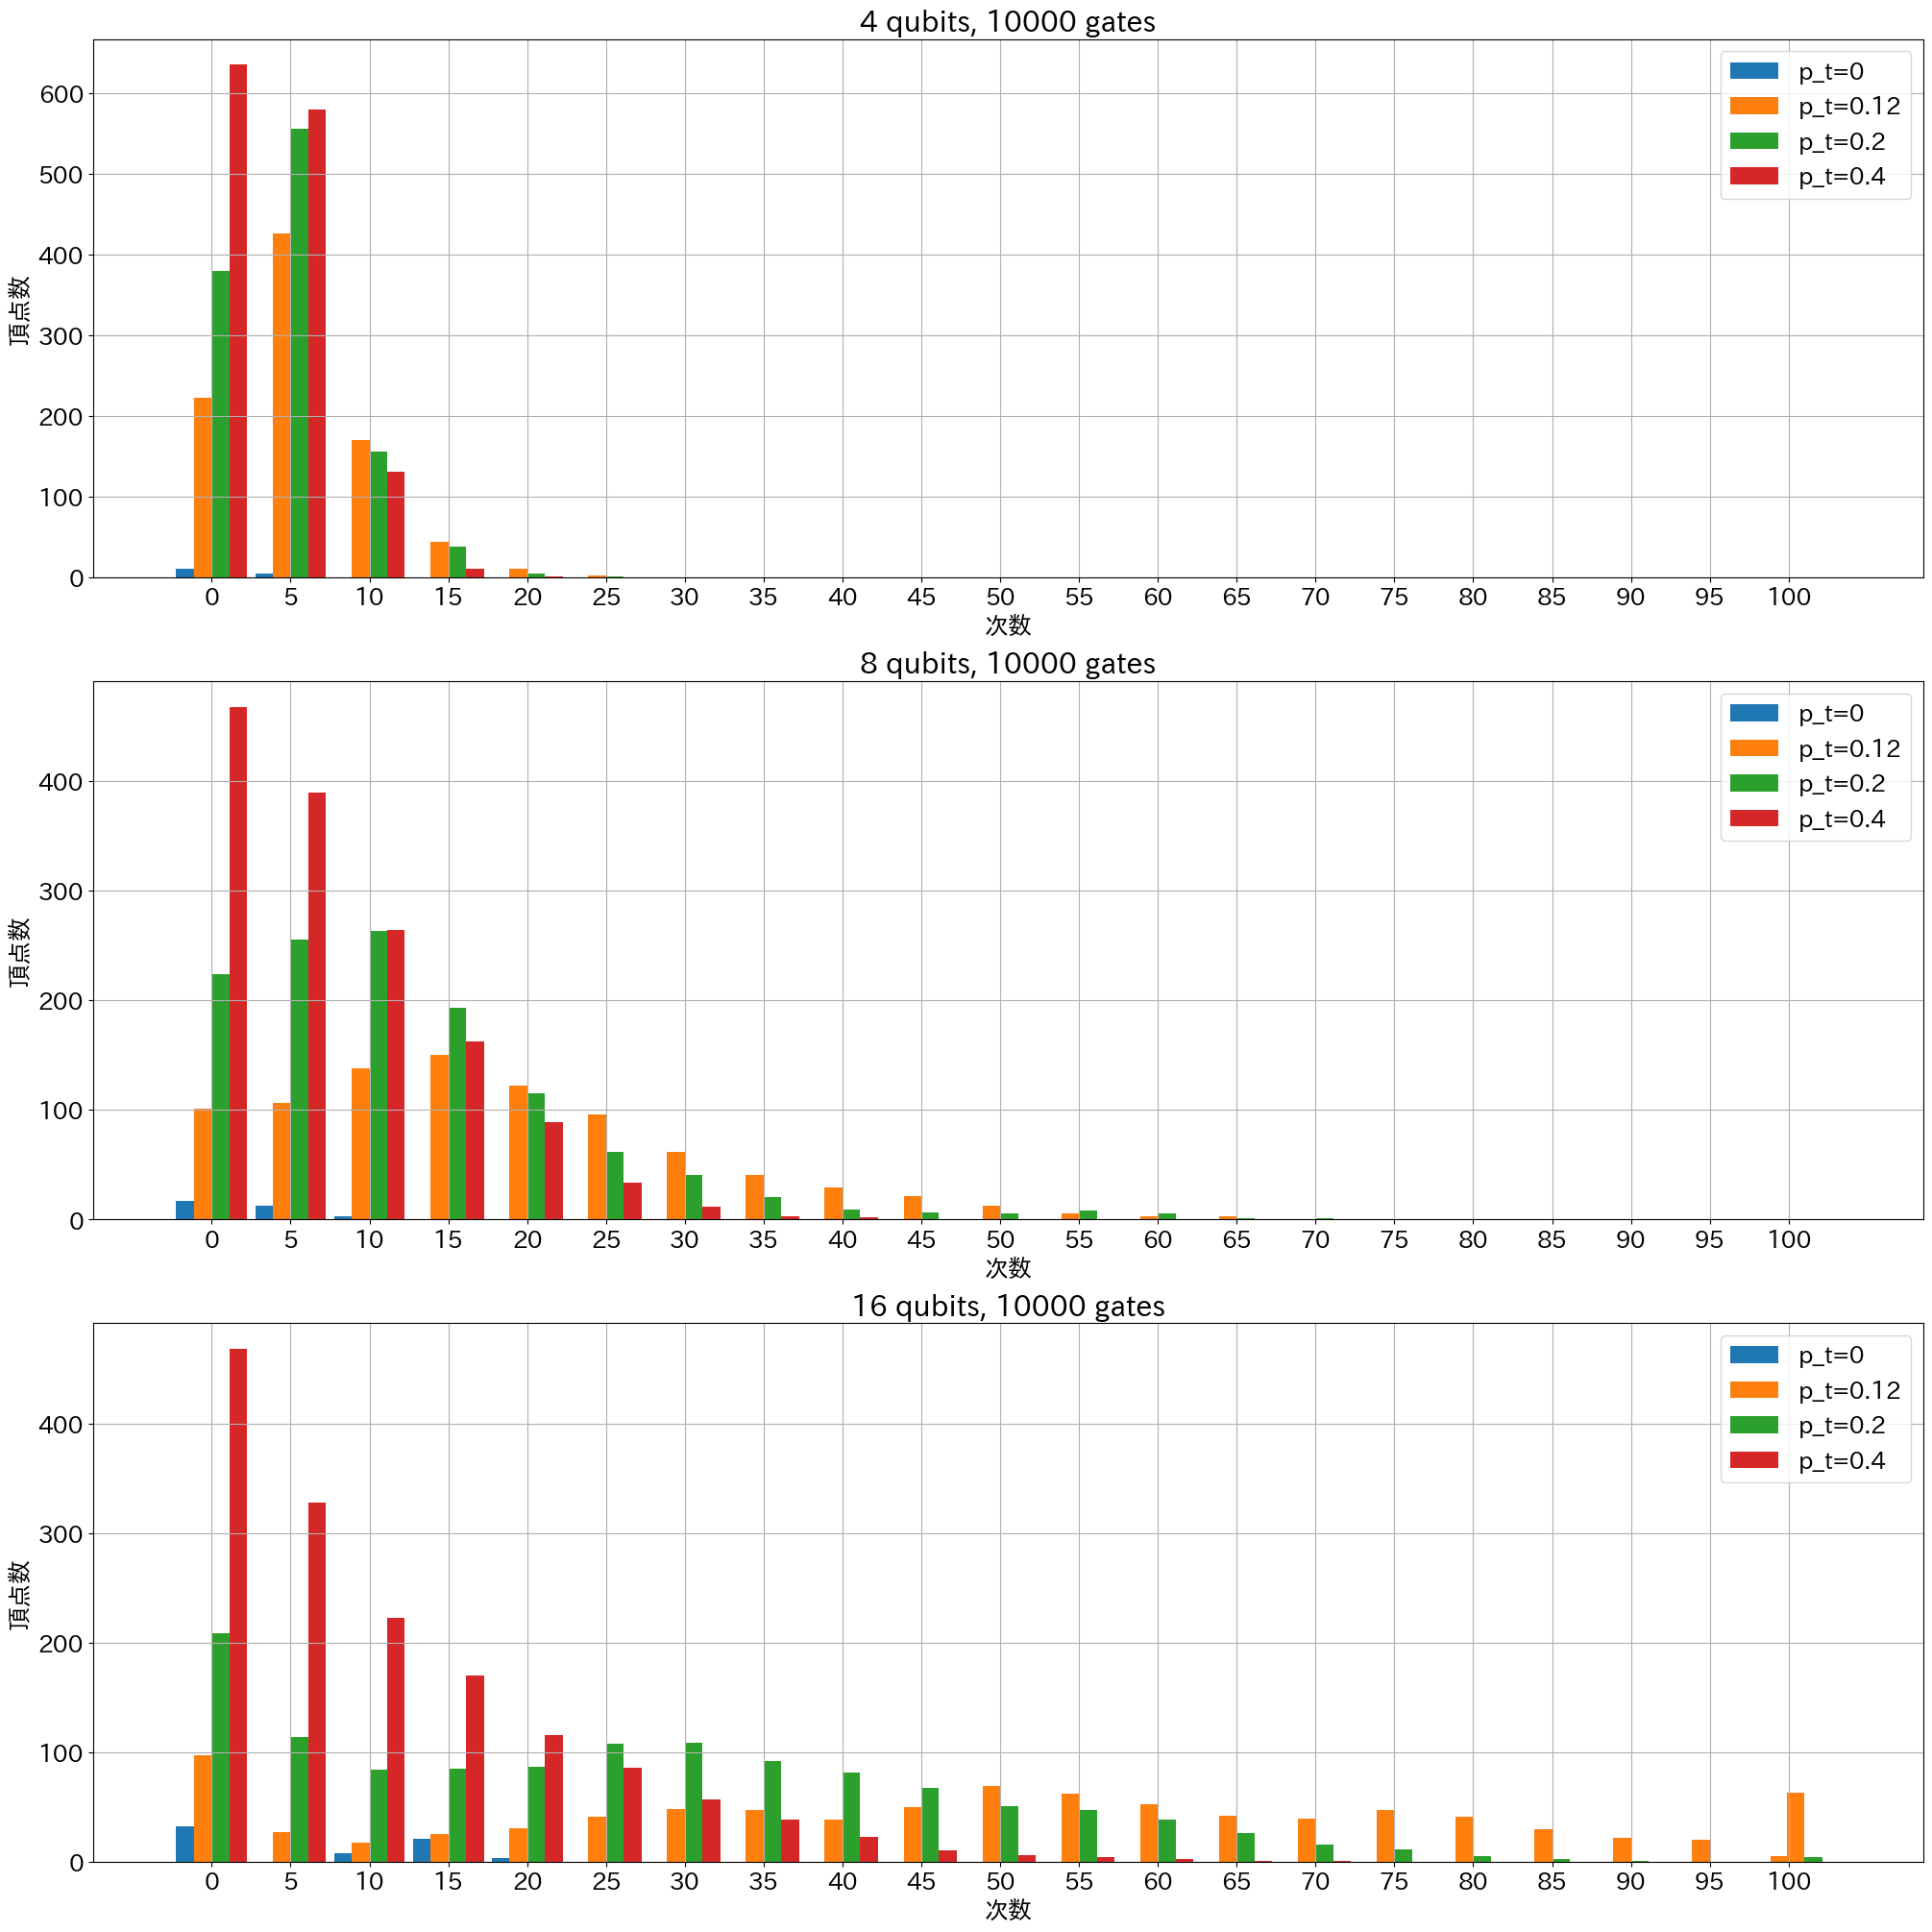

In [94]:
qubits = [4, 8, 16]
gates = [500, 1000, 5000, 10000]
p_t_lists = [0, 0.12, 0.20, 0.40]
plot_columns = [str(i) for i in range(0, 101, 5)]
plot_columns.append("101")

# 棒グラフの幅に関する設定
total_width = 4.5  # 横軸全体に占める幅
num_bars = len(p_t_lists)  # 棒グラフの本数
bar_width = total_width / num_bars  # 各棒グラフの幅

fig, ax = plt.subplots(len(qubits), figsize=(20, 20), constrained_layout=True)
plt.rcParams.update({'font.size': 18}) 
for qubit in range(len(qubits)):
    ax[qubit].set_title(f"{qubits[qubit]} qubits, 10000 gates")
    ax[qubit].set_xlabel("次数")
    ax[qubit].set_ylabel("頂点数")
    ax[qubit].set_xticks(np.arange(0, 101, 5))
    ax[qubit].grid(True)

    for p_t in range(len(p_t_lists)):
        # データのフィルタリング
        data = df[(df["p_t"] == p_t_lists[p_t]) & 
                  (df["qubit"] == qubits[qubit]) & 
                  (df["input_gates"] == 10000)]
        df_avg = data.groupby("optimize_name")[plot_columns].mean()
        numeric_data = df_avg.iloc[0].values.tolist()

        # x軸の位置を調整
        x = [i for i in range(0, 101, 5)]
        x.append(101)
        x_positions = [val + (p_t - (num_bars - 1) / 2) * bar_width for val in x]

        # 棒グラフの描画
        ax[qubit].bar(x_positions, numeric_data, 
                      label=f"p_t={p_t_lists[p_t]}", 
                      width=bar_width)

    # 凡例の追加
    ax[qubit].legend()

plt.show()

In [128]:
csv_file_path = "/home/rest/forpyzx/kekka0107/0107bunpu_2.csv"
df2 = pd.read_csv(csv_file_path)
print(df2)

                    optimize_name                       data_name  qubit  \
0    clifford_simp_not_post_basic       q4_gates500_pt0_seeds1000      4   
1    clifford_simp_not_post_basic       q4_gates500_pt0_seeds1001      4   
2    clifford_simp_not_post_basic       q4_gates500_pt0_seeds1002      4   
3    clifford_simp_not_post_basic    q4_gates500_pt0.04_seeds1000      4   
4    clifford_simp_not_post_basic    q4_gates500_pt0.04_seeds1001      4   
..                            ...                             ...    ...   
331  clifford_simp_not_post_basic  q16_gates10000_pt0.2_seeds1001     16   
332  clifford_simp_not_post_basic  q16_gates10000_pt0.2_seeds1002     16   
333  clifford_simp_not_post_basic  q16_gates10000_pt0.4_seeds1000     16   
334  clifford_simp_not_post_basic  q16_gates10000_pt0.4_seeds1001     16   
335  clifford_simp_not_post_basic  q16_gates10000_pt0.4_seeds1002     16   

     input_gates   p_t  seed  gates_aft  one-qubit_gates  two-qubit_gates  \
0         

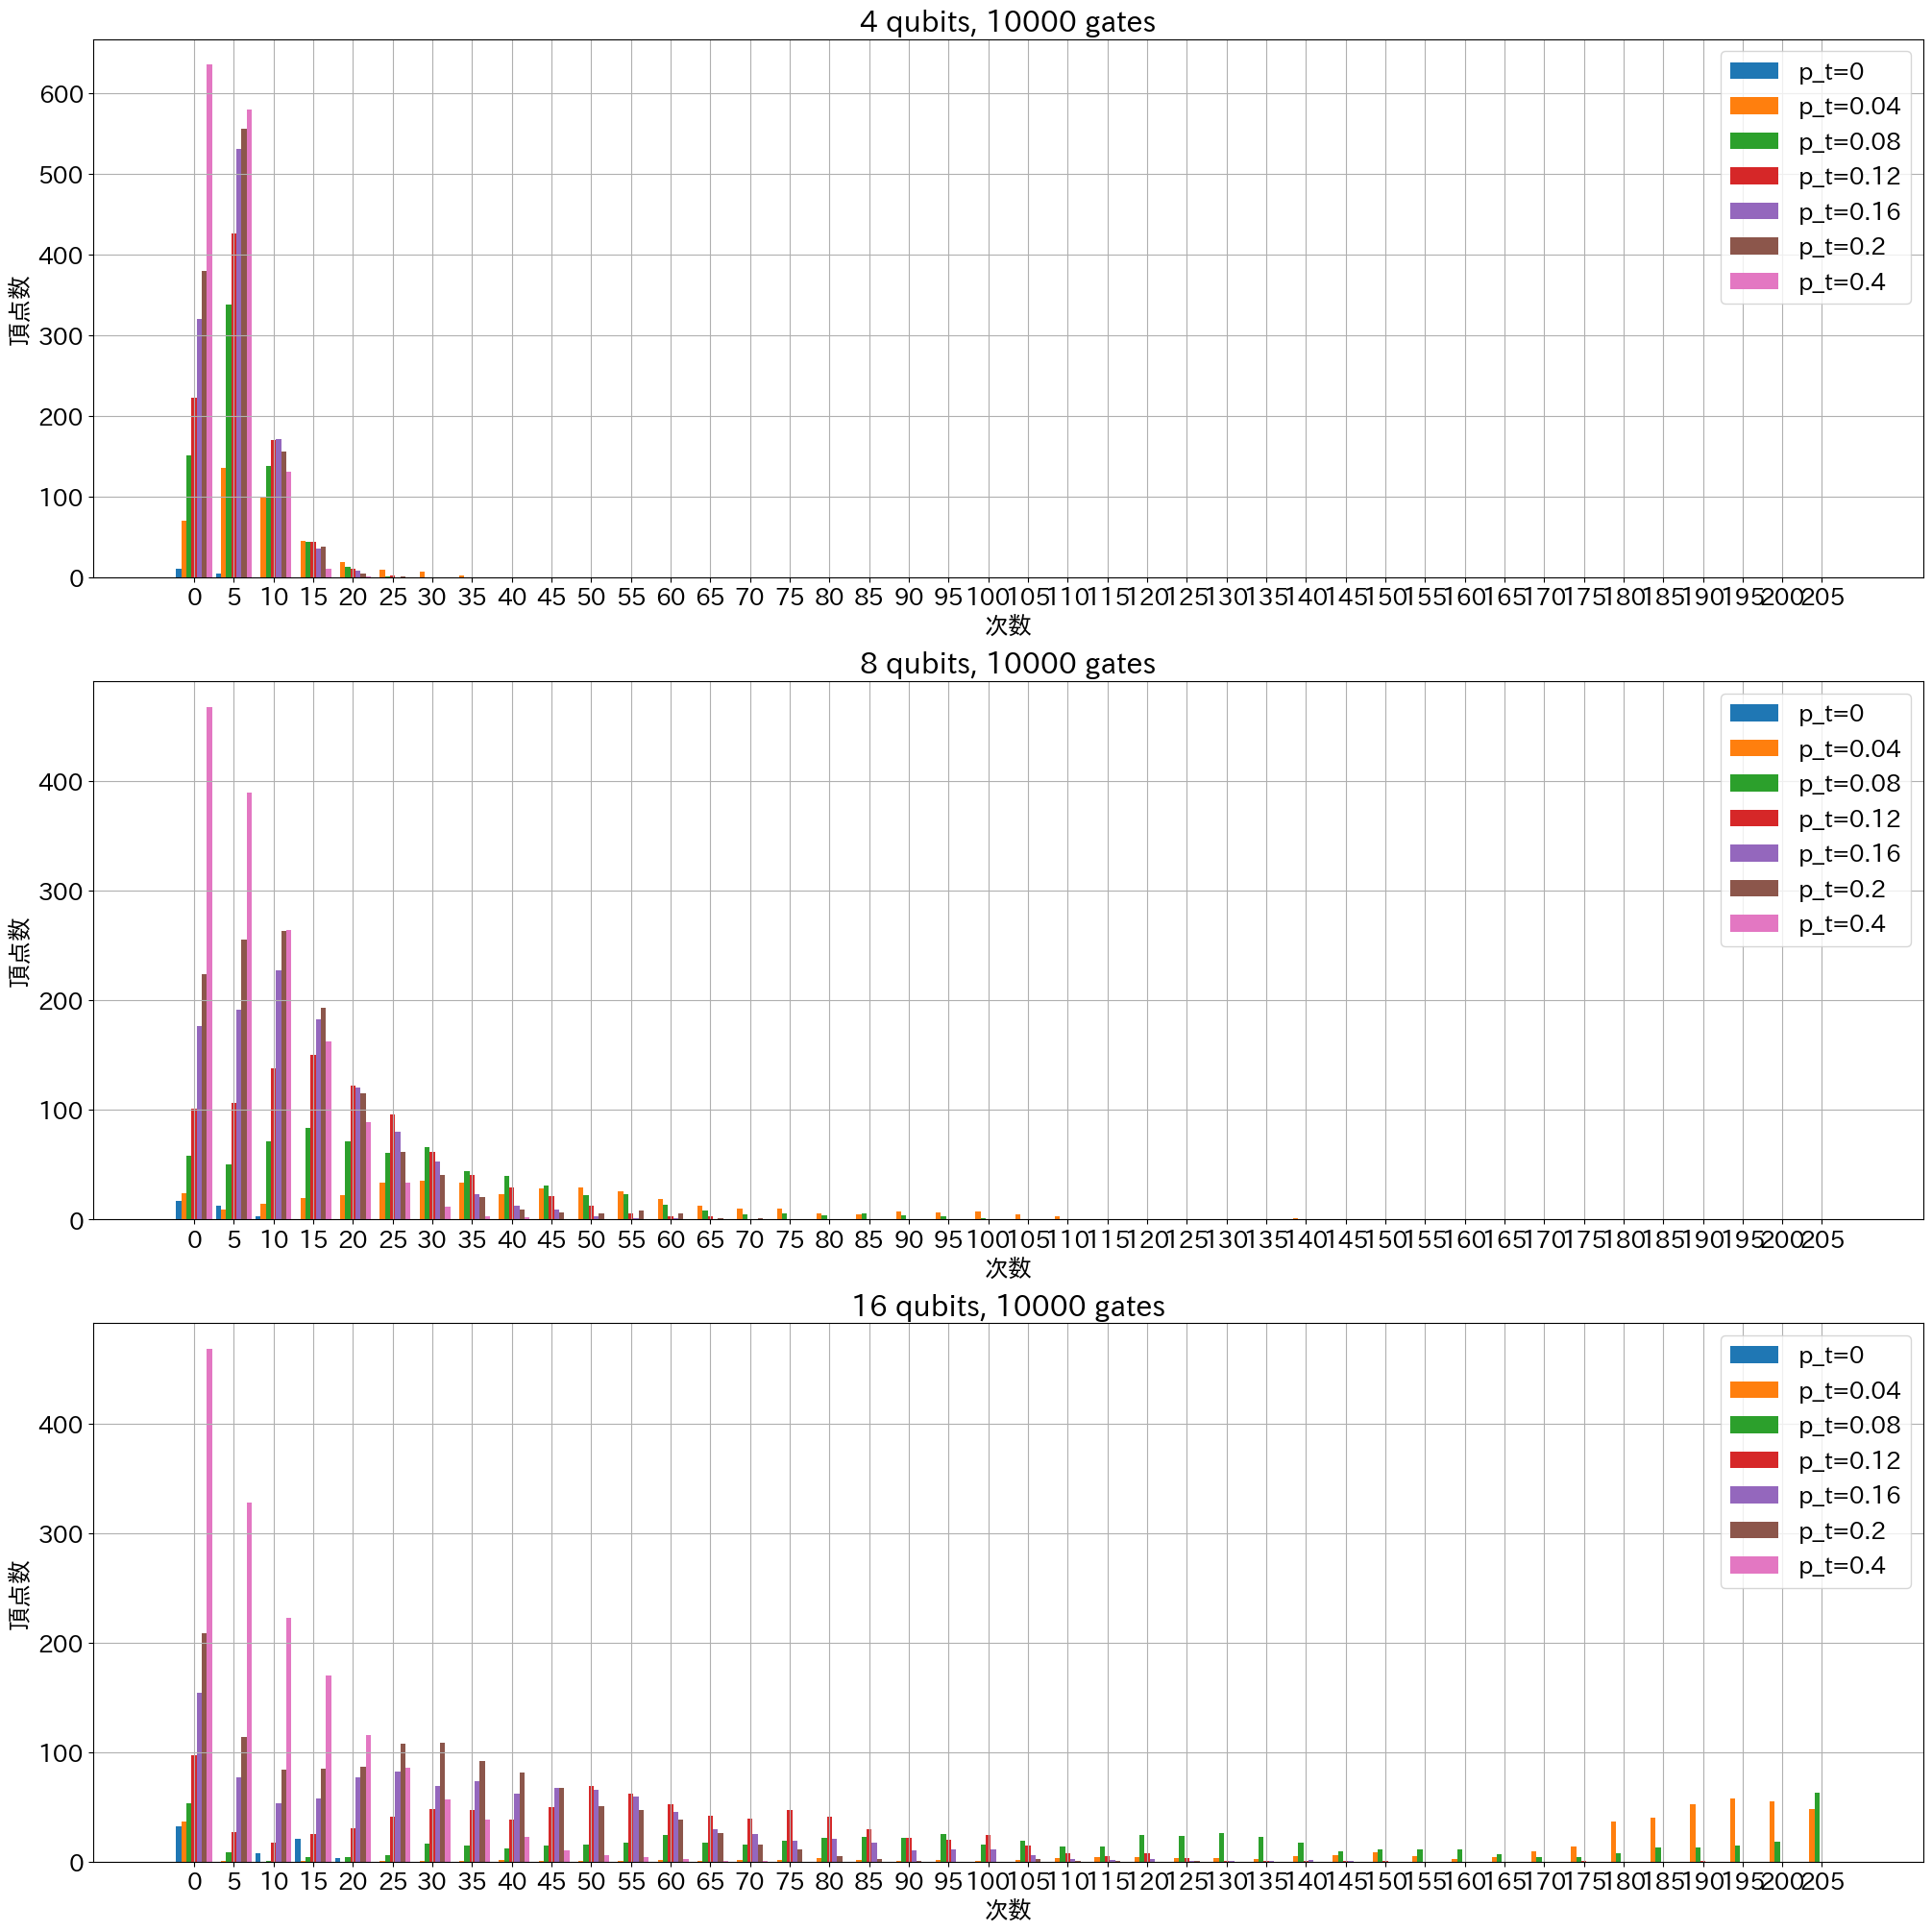

In [130]:
import numpy as np
from scipy.stats import skew

qubits = [4, 8, 16]
#gates = [500, 1000, 5000, 10000]
p_t_lists = [0,0.04,0.08,0.12,0.16,0.20,0.40]
plot_columns_str = [str(i) for i in range(0, 206, 5)]

# 棒グラフの幅に関する設定
total_width = 4.5  # 横軸全体に占める幅
num_bars = len(p_t_lists)  # 棒グラフの本数
bar_width = total_width / num_bars  # 各棒グラフの幅

fig, ax = plt.subplots(len(qubits), figsize=(20, 20), constrained_layout=True)
plt.rcParams.update({'font.size': 18}) 
for qubit in range(len(qubits)):
    ax[qubit].set_title(f"{qubits[qubit]} qubits, 10000 gates")
    ax[qubit].set_xlabel("次数")
    ax[qubit].set_ylabel("頂点数")
    ax[qubit].set_xticks(np.arange(0, 206, 5))
    ax[qubit].grid(True)

    for p_t in range(len(p_t_lists)):
        # データのフィルタリング
        data = df2[(df2["p_t"] == p_t_lists[p_t]) & 
                  (df2["qubit"] == qubits[qubit]) & 
                  (df2["input_gates"] == 10000)]
        df_avg = data.groupby("optimize_name")[plot_columns_str].mean()
        numeric_data = df_avg.iloc[0].values.tolist()

        # x軸の位置を調整
        x = [i for i in range(0, 206, 5)]
        x_positions = [val + (p_t - (num_bars - 1) / 2) * bar_width for val in x]

        # 棒グラフの描画
        ax[qubit].bar(x_positions, numeric_data, 
                      label=f"p_t={p_t_lists[p_t]}", 
                      width=bar_width)

    # 凡例の追加
    ax[qubit].legend()

plt.show()

[0.7234042553191489, 0.276595744680851, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.18127147766323023, 0.34879725085910657, 0.2551546391752577, 0.11597938144329897, 0.0506872852233677, 0.024054982817869417, 0.01804123711340206, 0.005154639175257732, 0.000859106529209622, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.22011661807580174, 0.4931972789115646, 0.20165208940719145, 0.06365403304178814, 0.019436345966958212, 0.0009718172983479105, 0.00048590864917395527, 0.00048590864917395527, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.2548571428571429, 0.4872380952380953, 0.19390476190476

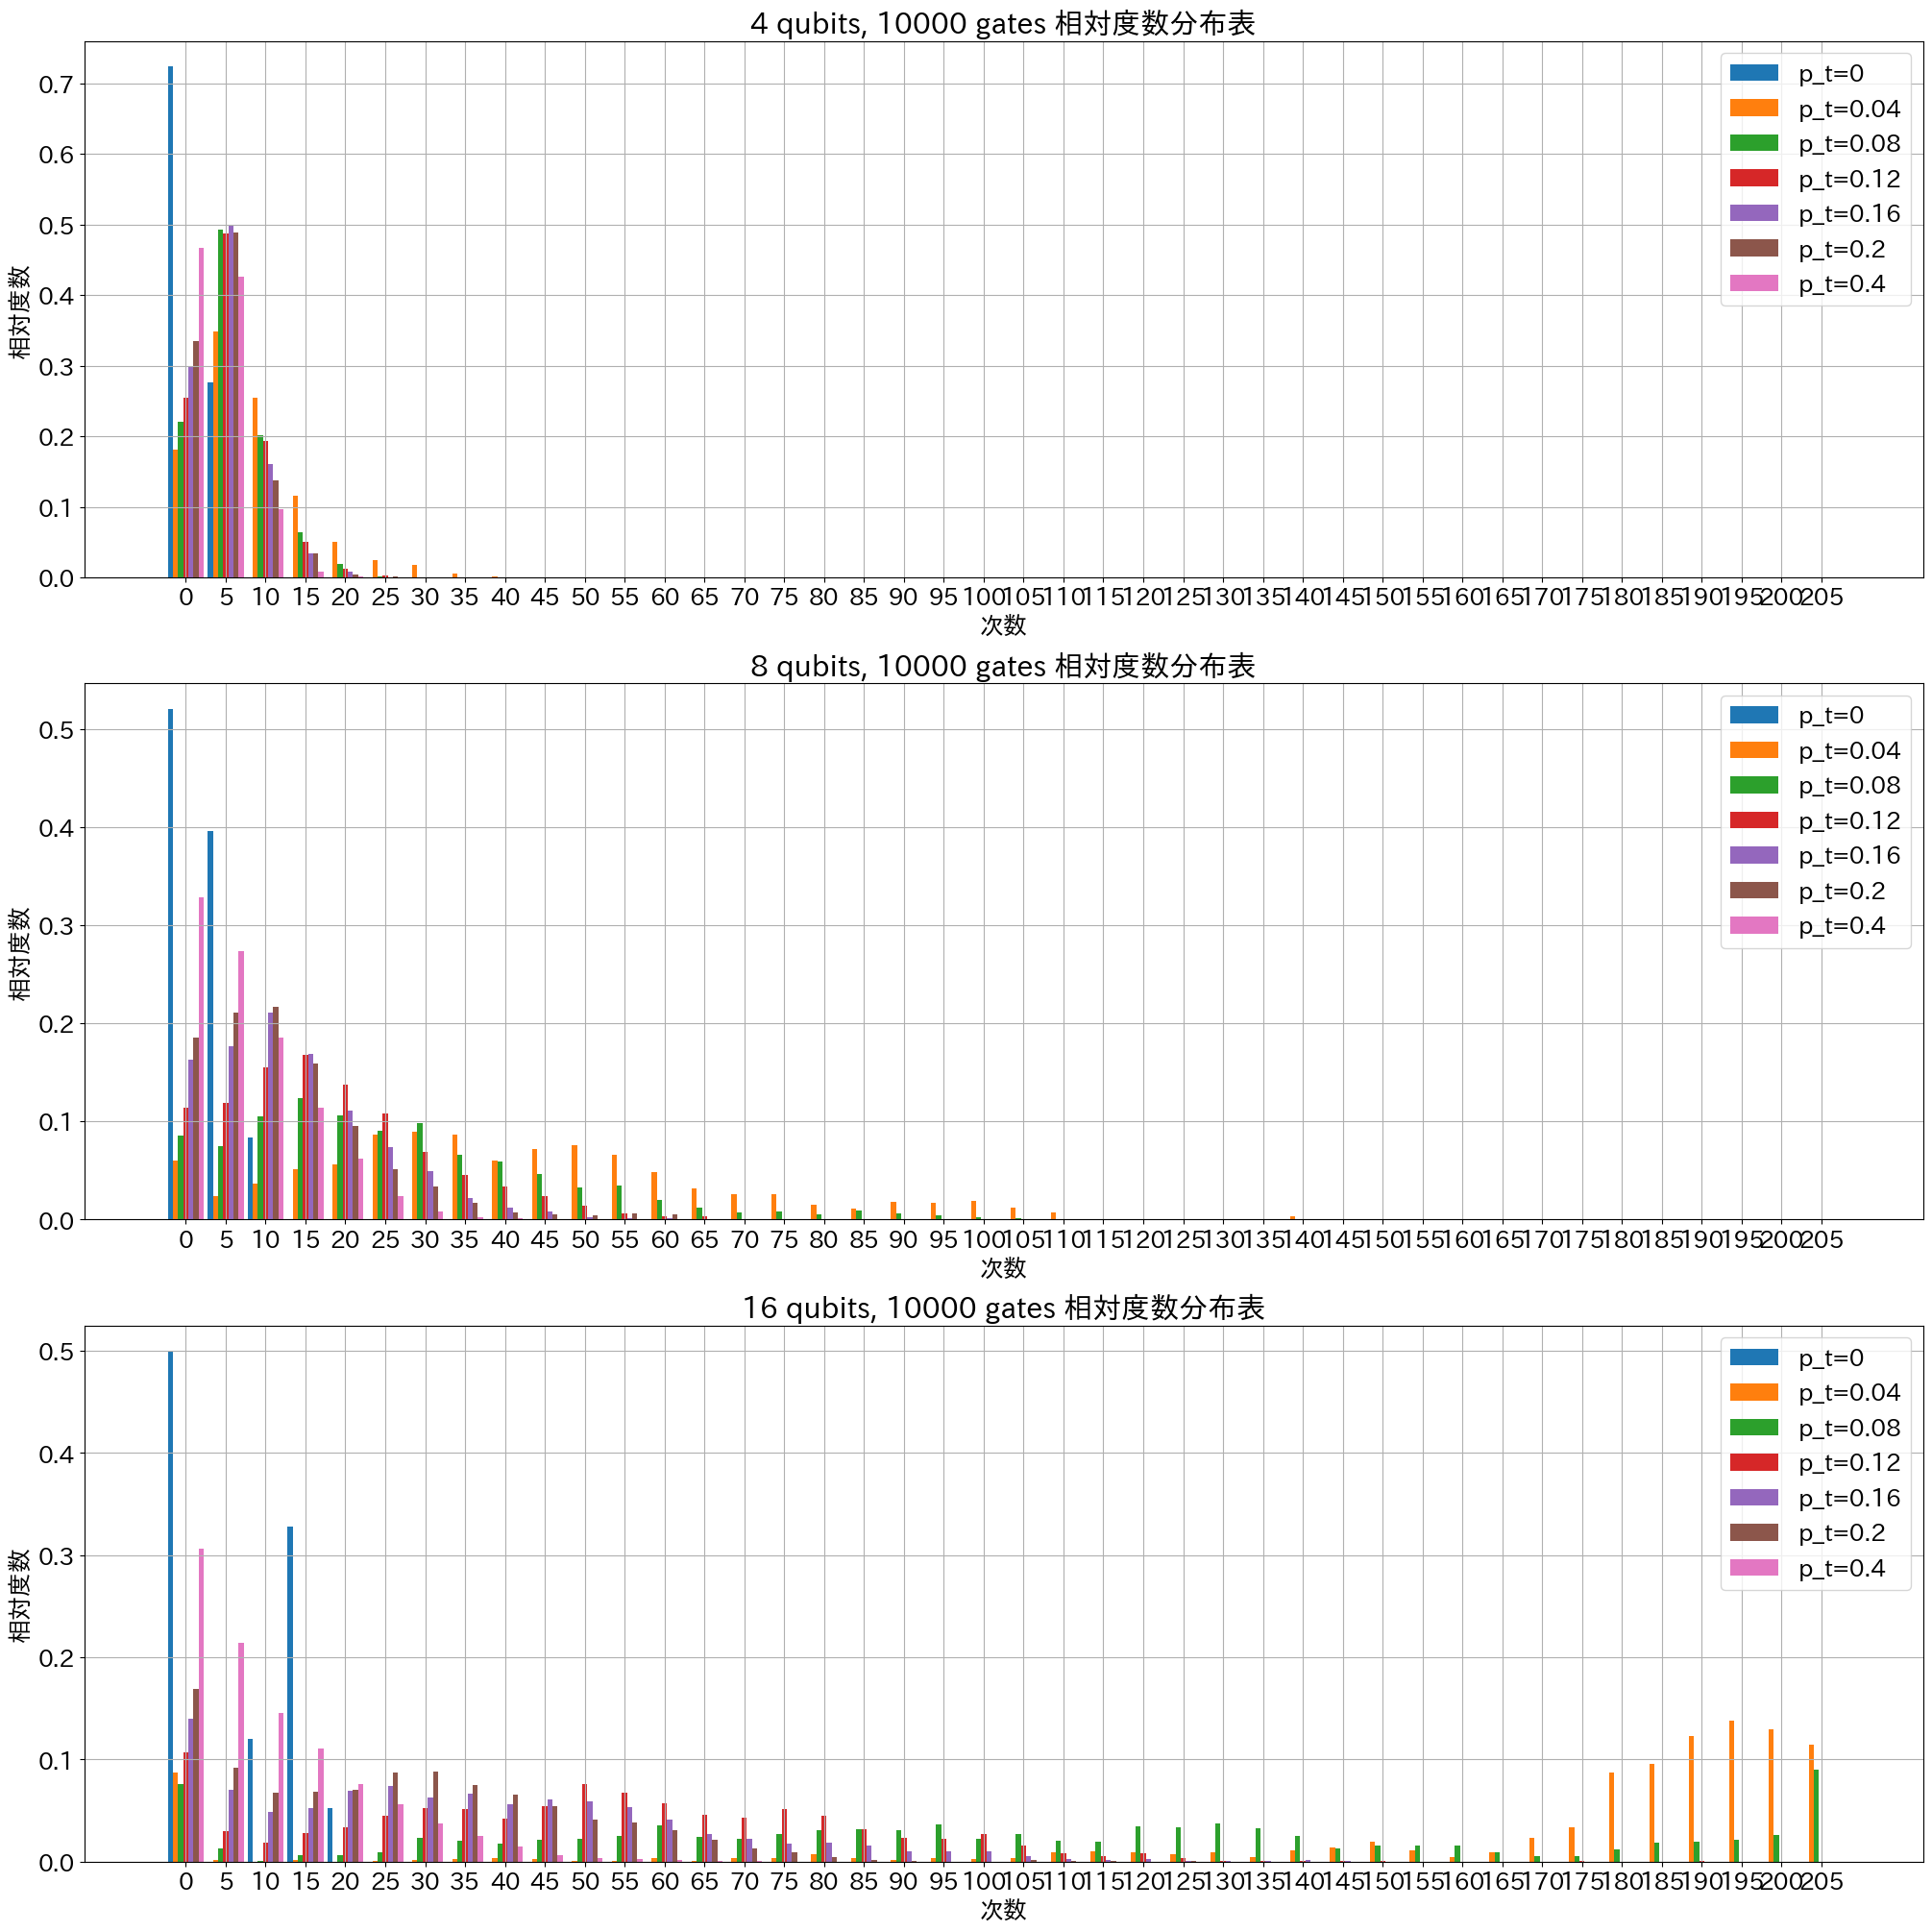

In [149]:
import numpy as np
from scipy.stats import skew

qubits = [4, 8, 16]
#gates = [500, 1000, 5000, 10000]
p_t_lists = [0,0.04,0.08,0.12,0.16,0.20,0.40]
plot_columns_str = [str(i) for i in range(0, 206, 5)]

# 棒グラフの幅に関する設定
total_width = 4.5  # 横軸全体に占める幅
num_bars = len(p_t_lists)  # 棒グラフの本数
bar_width = total_width / num_bars  # 各棒グラフの幅

fig, ax = plt.subplots(len(qubits), figsize=(20, 20), constrained_layout=True)
plt.rcParams.update({'font.size': 18}) 
for qubit in range(len(qubits)):
    ax[qubit].set_title(f"{qubits[qubit]} qubits, 10000 gates 相対度数分布表")
    ax[qubit].set_xlabel("次数")
    ax[qubit].set_ylabel("相対度数")
    ax[qubit].set_xticks(np.arange(0, 206, 5))
    ax[qubit].grid(True)

    for p_t in range(len(p_t_lists)):
        # データのフィルタリング
        data = df2[(df2["p_t"] == p_t_lists[p_t]) & 
                  (df2["qubit"] == qubits[qubit]) & 
                  (df2["input_gates"] == 10000)]
        df_avg = data.groupby("optimize_name")[plot_columns_str].mean()
        numeric_data = df_avg.iloc[0].values.tolist()
        #numetric_dataの各要素を正規化
        numeric_data = [i/sum(numeric_data) for i in numeric_data]
        #numetic_dataの歪度を計算しprint
        print(numeric_data)
        #print(skew(numeric_data))
        # x軸の位置を調整
        x = [i for i in range(0, 206, 5)]
        x_positions = [val + (p_t - (num_bars - 1) / 2) * bar_width for val in x]

        # 棒グラフの描画
        ax[qubit].bar(x_positions, numeric_data, 
                      label=f"p_t={p_t_lists[p_t]}", 
                      width=bar_width)

    # 凡例の追加
    ax[qubit].legend()

plt.show()

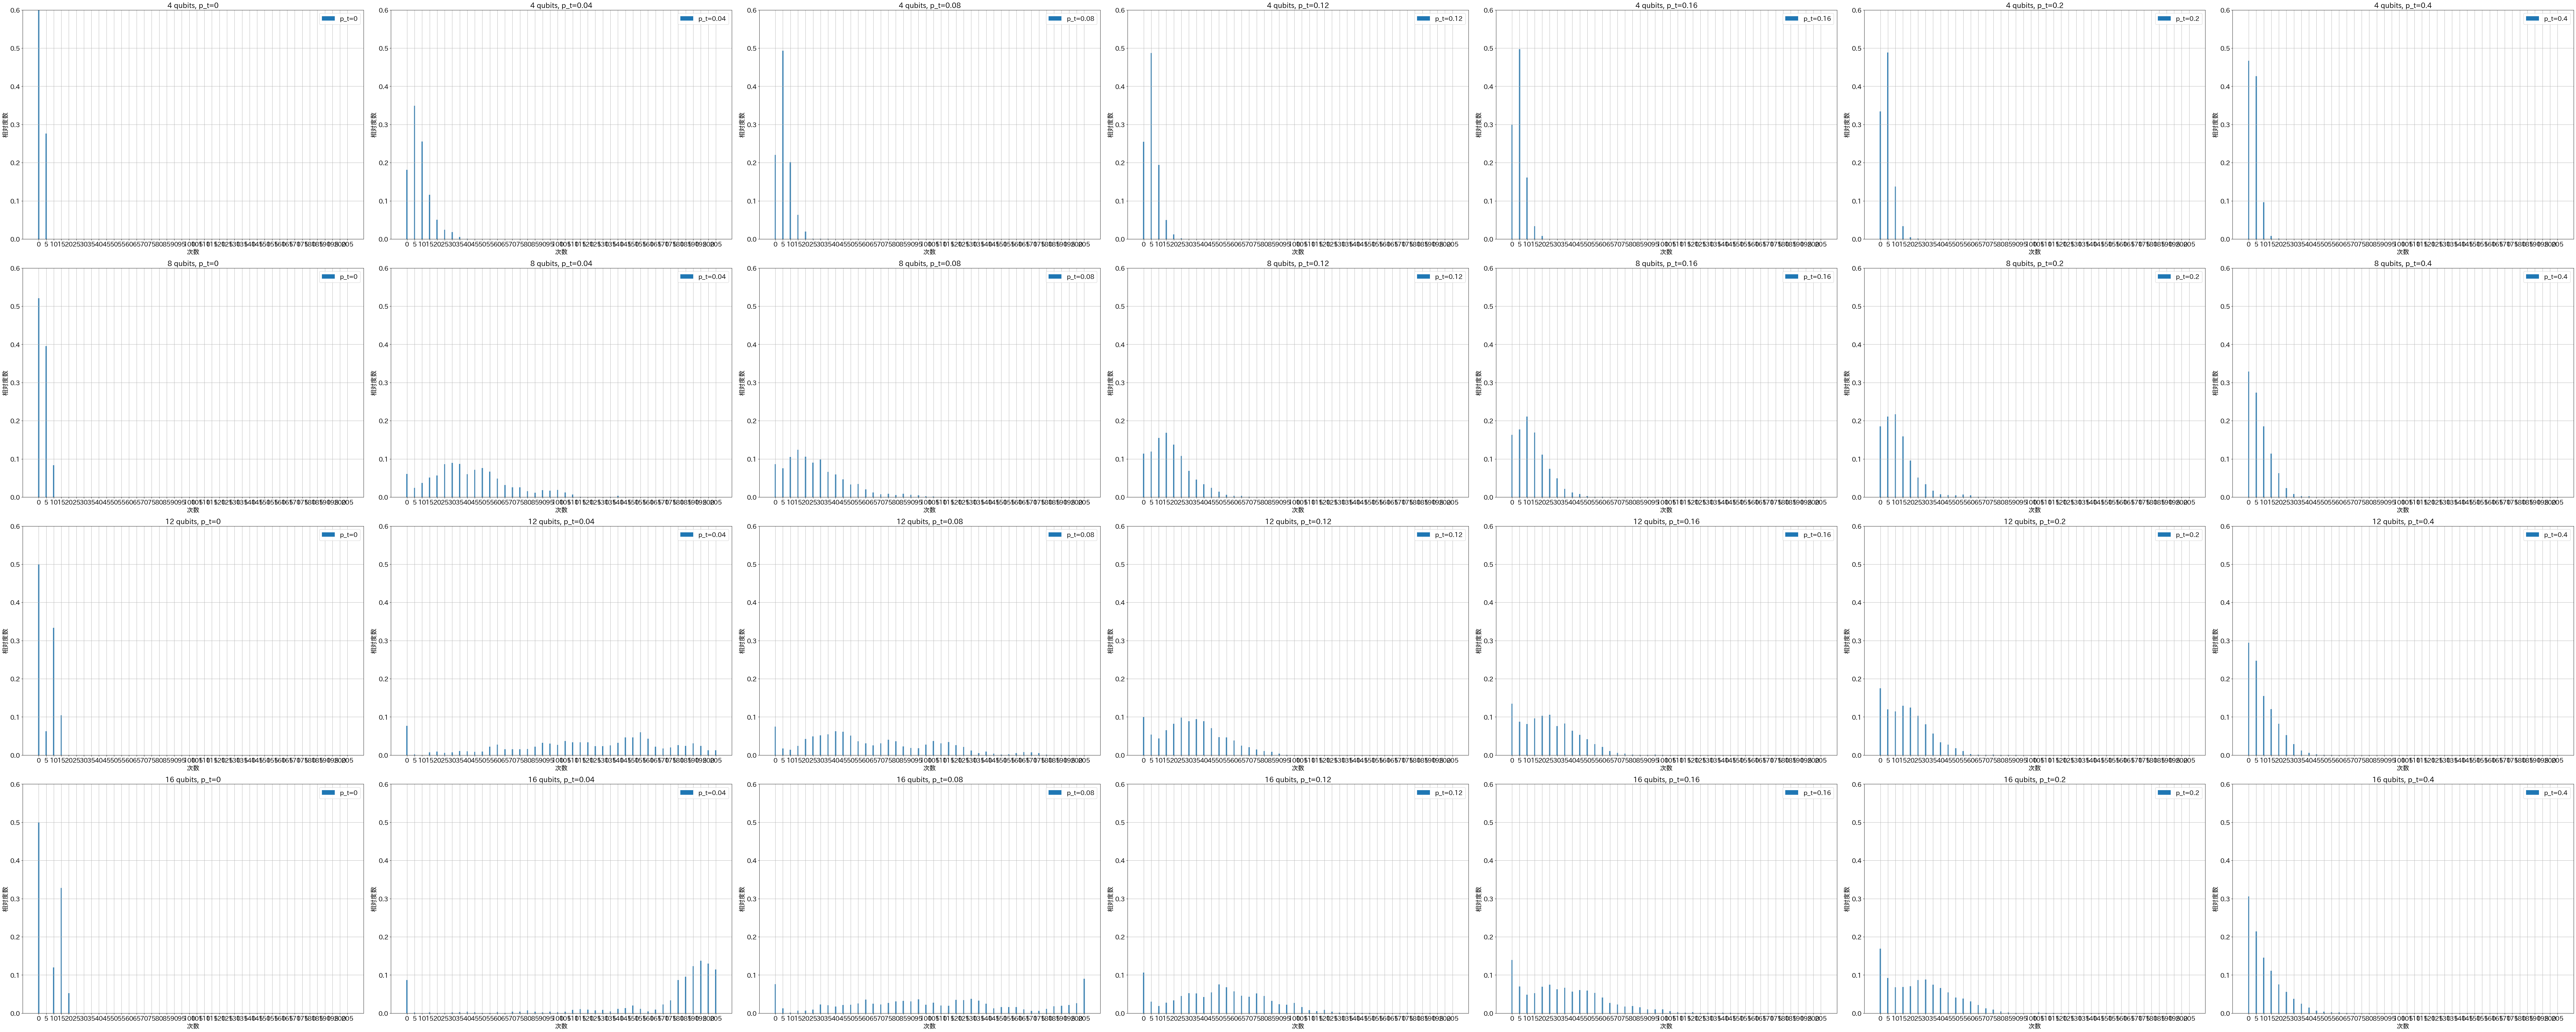

In [187]:
#各分布表を個別に表示
import numpy as np
from scipy.stats import skew

qubits = [4, 8, 12,16]
#gates = [500, 1000, 5000, 10000]
p_t_lists = [0,0.04,0.08,0.12,0.16,0.20,0.40]
plot_columns_str = [str(i) for i in range(0, 206, 5)]

fig, ax = plt.subplots(len(qubits),len(p_t_lists),figsize=(100, 40),constrained_layout=True)
for qubit in range(len(qubits)):
        for p_t in range(len(p_t_lists)):
            ax[qubit][p_t].set_title(f"{qubits[qubit]} qubits, p_t={p_t_lists[p_t]}",
                                     fontdict={'fontsize': 20})
            ax[qubit][p_t].set_xlabel("次数")
            ax[qubit][p_t].set_ylabel("相対度数")
            ax[qubit][p_t].set_xticks(np.arange(0, 206, 5))
            #縦軸の最大値を0.5に設定
            ax[qubit][p_t].set_ylim(0,0.6)
            ax[qubit][p_t].grid(True)

            data = df2[(df2["p_t"] == p_t_lists[p_t]) & (df2["qubit"] == qubits[qubit]) & (df2["input_gates"] == 10000)]
            df_avg = data.groupby("optimize_name")[plot_columns_str].mean()
            numeric_data = df_avg.iloc[0].values.tolist()
            #numetric_dataの各要素を正規化
            numeric_data = [i/sum(numeric_data) for i in numeric_data]

            # x軸の位置を調整
            x = [i for i in range(0, 206, 5)]
            x_positions = [val for val in x]

            # 棒グラフの描画
            ax[qubit][p_t].bar(x_positions, numeric_data, 
                      label=f"p_t={p_t_lists[p_t]}")

            # 凡例の追加
            ax[qubit][p_t].legend()
plt.show()


5.307440160731536
5.307440160731536
3.364373379969695
3.3643733799696944
4.299924951191865
4.299924951191866
4.187817231253001
4.187817231253004
4.216772582960194
4.216772582960195
4.168349719650274
4.168349719650275
4.120235773028785
4.120235773028788
4.2772084051917165
4.277208405191717
0.979442833462158
0.9794428334621579
1.3932813379006757
1.3932813379006763
1.9112385668458753
1.9112385668458747
2.301697777760479
2.301697777760479
2.5067316592840543
2.5067316592840543
3.239312802982971
3.239312802982973
4.257195959583886
4.257195959583886
1.846181359769677
1.8461813597696763
2.2159251668130984
2.2159251668130975
1.0060727011041943
1.006072701104194
1.478696409782934
1.478696409782934
1.776609377966984
1.7766093779669831
3.190173788401799
3.190173788401799


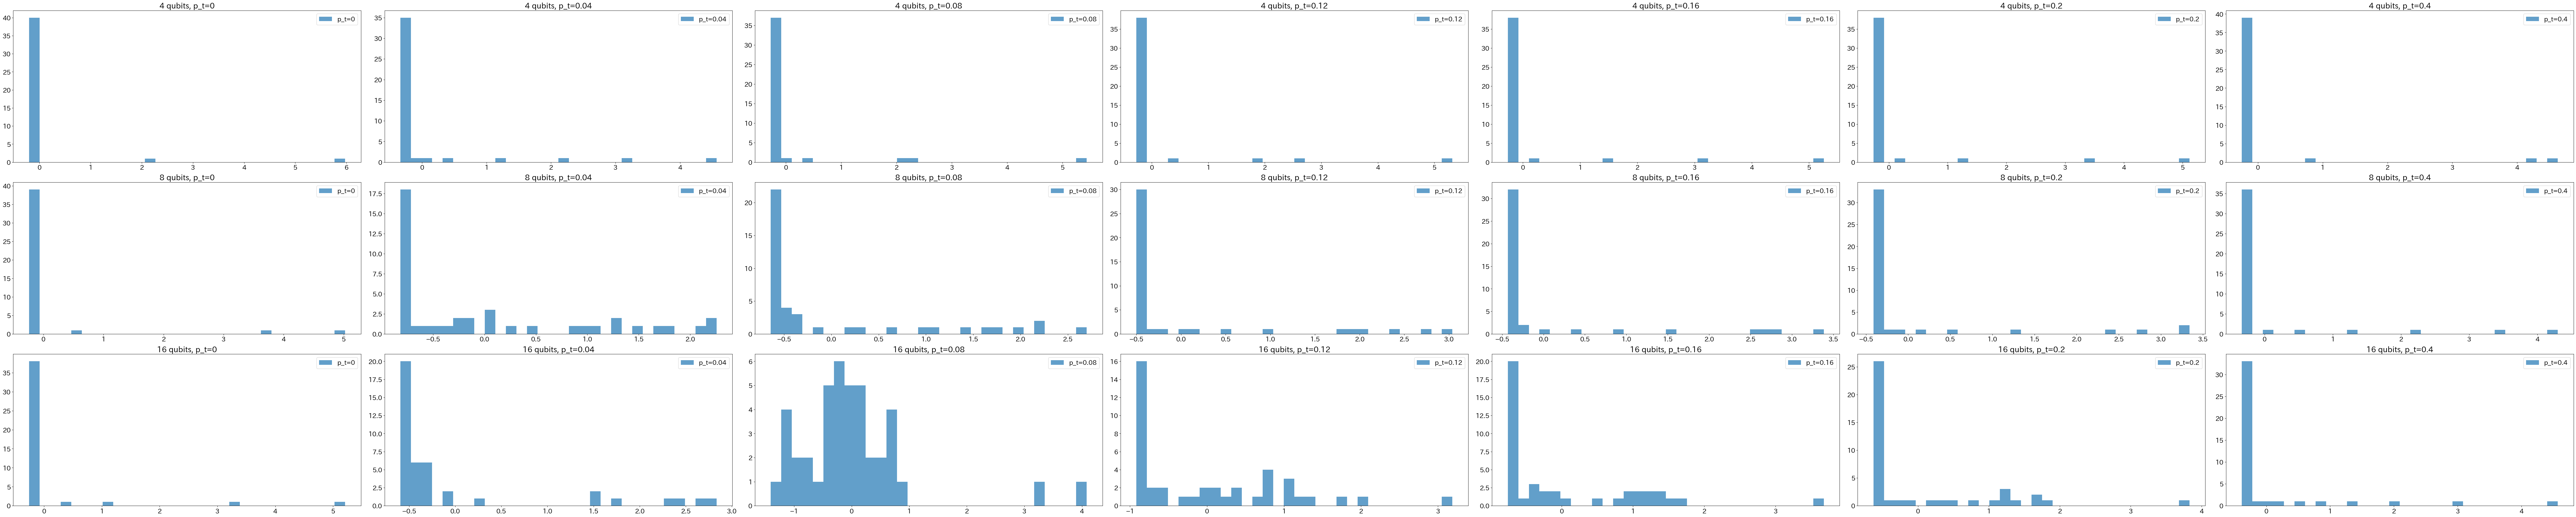

In [ ]:
#各分布表を個別に表示
import numpy as np
from scipy.stats import skew

qubits = [4, 8, 16]
p_t_lists = [0,0.04,0.08,0.12,0.16,0.20,0.40]
plot_columns_str = [str(i) for i in range(0, 206, 5)]

fig, ax = plt.subplots(len(qubits),len(p_t_lists),figsize=(100, 20),constrained_layout=True)
for qubit in range(len(qubits)):
        for p_t in range(len(p_t_lists)):
            ax[qubit][p_t].set_title(f"{qubits[qubit]} qubits, p_t={p_t_lists[p_t]}")
            data = df2[(df2["p_t"] == p_t_lists[p_t]) & (df2["qubit"] == qubits[qubit]) & (df2["input_gates"] == 10000)]
            df_avg = data.groupby("optimize_name")[plot_columns_str].mean()
            numeric_data = df_avg.iloc[0].values.tolist()
            #print(numeric_data)
            #Z-score normalization
            print(skew(numeric_data))
            mean = np.mean(numeric_data)
            std_dev = np.std(numeric_data)
            z_normalized = (numeric_data - mean) / std_dev
            #print(z_normalized.mean())
            #歪度を計算
            #print(skew(z_normalized))
            
            #ヒストグラムの描画
            ax[qubit][p_t].hist(z_normalized, bins=30, alpha=0.7, label=f"p_t={p_t_lists[p_t]}")
            ax[qubit][p_t].legend()
plt.show()

[np.float64(5.307440160731538), np.float64(3.3643733799696944), np.float64(4.299924951191864), np.float64(4.187817231253002), np.float64(4.216772582960192), np.float64(4.1683497196502755), np.float64(4.120235773028784), np.float64(4.2772084051917165), np.float64(0.9794428334621578), np.float64(1.3932813379006759), np.float64(1.9112385668458756), np.float64(2.301697777760478), np.float64(2.5067316592840516), np.float64(3.2393128029829725), np.float64(4.257195959583886), np.float64(1.8461813597696763), np.float64(2.2159251668130975), np.float64(1.0060727011041943), np.float64(1.478696409782934), np.float64(1.776609377966984), np.float64(3.190173788401799)]
[np.float64(9.333333333333334), np.float64(713.3333333333334), np.float64(1210.0), np.float64(1512.3333333333333), np.float64(1726.6666666666667), np.float64(1792.3333333333333), np.float64(1841.0), np.float64(40.666666666666664), np.float64(1604.3333333333333), np.float64(2548.0), np.float64(3200.6666666666665), np.float64(3520.666666

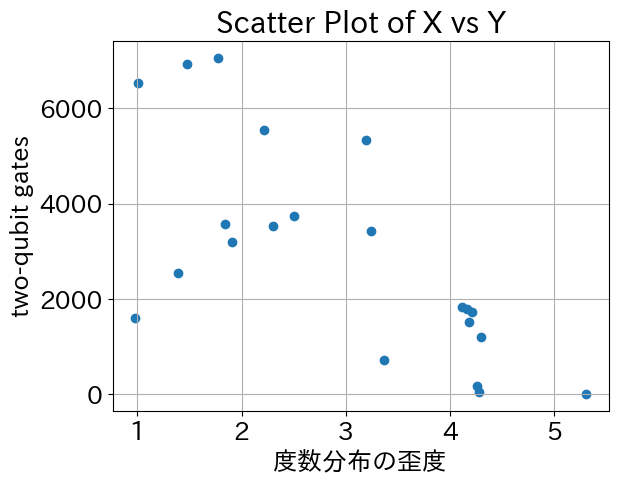

In [ ]:
import numpy as np
from scipy.stats import skew

qubits = [4, 8, 16]
#gates = [500, 1000, 5000, 10000]
p_t_lists = [0,0.04,0.08,0.12,0.16,0.20,0.40]
plot_columns_str = [str(i) for i in range(0, 206, 5)]

plt.title('Scatter Plot of X vs Y')  # タイトル
plt.xlabel('度数分布の歪度')  # X軸ラベル
plt.ylabel('two-qubit gates')  # Y軸ラベル
plt.grid(True)  # グリッドを表示

x =[]
y =[]

for q in qubits:
    for p_t in p_t_lists:
        data = df2[(df2["p_t"] == p_t) & (df2["qubit"] == q) & (df2["input_gates"] == 10000)]
        df_avg = data.groupby("optimize_name")[plot_columns_str].mean()
        frequency = []
        #df_avg　から各次数を取り出して、dosuに格納
        for i in range(0, 206, 5):
            frequency.append(df_avg.iloc[0][str(i)])
        #相対度数分布へ
        relative_frequency = frequency / np.sum(frequency) 
        #dosuからskewnessを計算
        skewness = skew(relative_frequency)
        #print(skewness)

        #two-qubit_gatesの平均値を取得
        data2 = data.groupby("optimize_name")["two-qubit_gates"].mean()
        two_qubit_gates = data2.iloc[0]
        #print(two_qubit_gates)

        #散布図の描画
        #plt.scatter(skewness, two_qubit_gates, label=f"qubit={q}, p_t={p_t}")
        x.append(skewness)
        y.append(two_qubit_gates)

print(x)
print(y)
plt.scatter(x, y)
#plt.legend()  # 凡例を表示
plt.show()



1.571508203526583
1.571508203526583


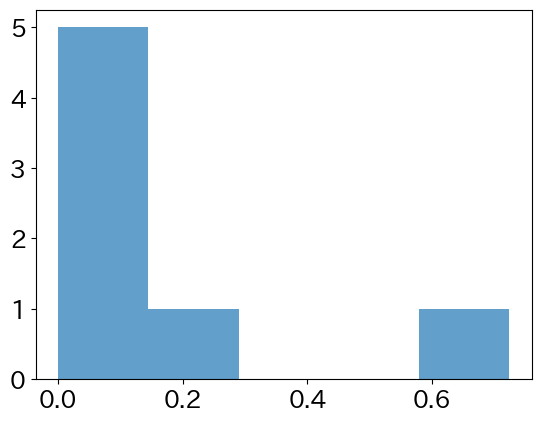

In [ ]:
x =[0.7234042553191489, 0.276595744680851,0,0,0,0,0]
#xを正規化

skew(x)
print(skew(x))
from scipy.stats import zscore
print(np.mean(zscore(x)**3))

plt.hist(x, bins=5, alpha=0.7)

import matplotlib.pyplot as plt
import numpy as np


# ランダムなデータを生成（例えば、正規分布に従うデータ）
data = np.random.randn(1000)
# ヒストグラムを作成
#plt.hist(data, bins=30, edgecolor='black')

# タイトルとラベルの設定
#plt.title('Histogram Example')
#plt.xlabel('Value')
#plt.ylabel('Frequency')
#print(skew(data))

# ヒストグラムを表示
#plt.show()

